# BF550 Lab 10 Fall 2022

Principal component analysis (PCA) is a common dimensionality reduction technique that can allow for the visualization of high-dimensional data. In Python, the most common way to perform PCA is with scikit-learn's implementation: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA

import scipy.stats as sps
from scipy.spatial.distance import pdist, squareform

def clr(x):
    """
    Perform the centered-log ratio transform
    More info at: https://en.wikipedia.org/wiki/Compositional_data
    """
    return np.log(x / sps.gmean(x))

# Part 1: PCA on synthetic data
Here we will introduce the syntax for implementing PCA in Python on a 4-dimensional synthetic dataset of 60 samples from two populations.

# Problem 1.
First, we will generate a synthetic dataset with four normally distributed features (dimensions).
1. Generate samples for population A: Generate 30 samples from 4 normal distributions each with $\mu$=0 (resulting in one 30 x 4 matrix). 
2. Generate samples for population B: Generate 30 samples from 4 normal distributions each with $\mu$=1.5. *Note how these means differ than those for population A*.
3. Stack these two matrices together to create one 60 x 4 dataset.

In [8]:
"Generate synthetic data"
N = 30

# Sample from normal distributions
a = np.random.normal(loc=0.0, scale=1.0, size=(N,4))
b = np.random.normal(loc=1.5, scale=1.0, size=(N,4))

# Vertically stack a and b into one matrix
data = np.vstack((a,b))

data[:5]
#data.shape

array([[ 1.1610953 , -1.19672442, -0.88563098,  0.87676179],
       [-0.47683429,  1.61725128,  1.15407304,  1.09552719],
       [-0.9953549 , -0.9717135 , -0.52296249,  0.52097694],
       [ 0.12733304, -0.68391319,  0.82096545, -1.79734614],
       [ 0.54723975, -2.90375241,  0.19604392,  0.42087704]])

# Problem 2: Compute PCA on synthetic data
You can view sklearn's PCA function here: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA.

To compute PCA, you make a model object, specify parameters (number of components; in our case 2), and then use the `fit_transform()` method, which train the model and then perform PCA on the provided data. For example:

```python
# Note that the PCA class has already been imported
pca = PCA(2).fit_transform(data)
```

1. Compute PCA on this dataset for to generate the first 2 components. Notice that sklearn expects samples to be rows and features to be columns of your matrix (as is done here). This will return a matrix of the first two principal components for the provided data.
2. Place this matrix into a DataFrame and name the columns `PC1` and `PC2`
3. Create a new column called `population` that labels each sample (row) by its corresponding population (A for the first 30 samples and B for the next 30).
4. Plot a scatterplot of the dimensionality reduced and color by `population`.

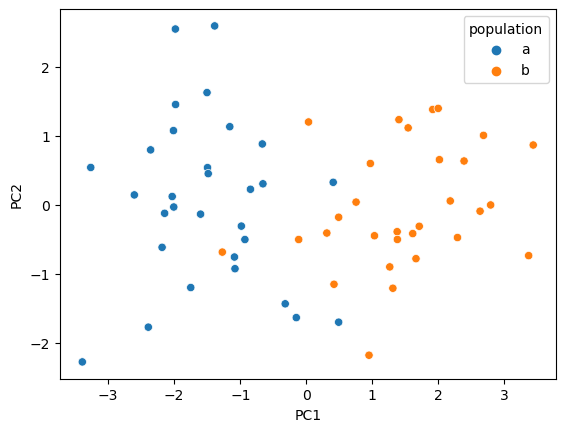

In [32]:
"Compute PCA"
pca = PCA(2).fit_transform(data)

"Place into DataFrame"
pca_df = pd.DataFrame(data=pca,columns=["PC1","PC2"])
pca_df['population']=np.repeat(['a','b'],30)
"Scatterplot of PCA"
sns.scatterplot(data=pca_df,x="PC1",y="PC2",hue="population")
plt.show()

## Explained variance
We can get the percent explained variance of each principal component if we first `fit` a PCA model and then access the `explained_variance_ratio_` attrribute. We can then apply the dimensionality reduction with `transform`.  For example:

```python
# Fit PCA model
pca = PCA(2).fit(data)

# Get percent explained variance
evr = pca.explained_variance_ratio_

# Now apply dim reduction
dr = pca.transform(data)
```

Note that doing `fit(data)` and then `tranform(data)` is the same as `fit_transform(data)`, as we did above.

# Part 2: PCA on real microbiome data
**Motivating question**: How do microbial communities grown in different conditions change in their composition over time?

Here, we will use PCA to visualize how different microbial communities cultured in differnt types of media change in their taxonomic membership over time. The dataset for this exercise contains data from two different studies ([Goldford 2018](https://www-science-org.ezproxy.bu.edu/doi/10.1126/science.aat1168) and [Bittleston 2020](https://www.nature.com/articles/s41467-020-15169-0)) with a total of 350 samples recording the relative abundance of 3896 "ASVs" or species (that's way too many dimensions to visualize without PCA!). One study (Goldford), grew different microbial communities in glucose and another study (Bittleston), grew different microbial communities in cricket media.


In the ASV table, each `Sample` records the relative abundance of all observed species in a particular `study`, grown in a particular `media`, from a particular `source` microbial community, from a particular `days`. Note that each `Sample` in the metadata (index) corresponds to a column of the ASV table.

First we will load and pre-process the count data (the ASV table) and the metadata.

In [33]:
"Load ASV"
# Load the Amplicon sequence variant table (ASVs)
asv = pd.read_csv('bf550_lab10_goldford_bittleston_asv.csv', index_col=0)
# Perform CLR transform to account for compositionality
asv = asv.add(.5).apply(clr)

asv.head()

,SRR9953697,SRR9953699,SRR9953702,SRR9953704,SRR9953706,SRR9953712,SRR9953718,SRR9953720,SRR9953722,SRR9953724,...,SRR7134016_Glucose_goldford_X7_4.0,SRR7134398_Glucose_goldford_X2_1.0,SRR7134401_Glucose_goldford_X8_4.0,SRR7134120_Glucose_goldford_X3_4.0,SRR7134117_Glucose_goldford_X9_4.0,SRR7134107_Glucose_goldford_X4_4.0,SRR7134106_Glucose_goldford_X10_4.0,SRR7133937_Glucose_goldford_X5_4.0,SRR7134351_Glucose_goldford_X6_1.0,SRR7134353_Glucose_goldford_X12_4.0
asv,,,,,,,,,,,,,,,,,,,,,
d007cee006889a1090c2d5bfb35a1953,7.869019,8.474893,8.985022,9.164119,8.748886,5.545208,9.326909,8.091251,7.558787,7.864320,...,-0.112467,-0.254557,-0.155960,-0.065517,-0.145353,-0.076602,-0.121678,-0.176475,-0.070559,-0.118906
38c27ceaed634984c1225a82648cf571,-0.040470,6.513475,8.918717,9.643174,8.820274,7.359971,9.663284,9.800240,9.637535,10.044329,...,-0.112467,-0.254557,-0.155960,-0.065517,-0.145353,-0.076602,-0.121678,-0.176475,-0.070559,-0.118906
d32e579b3ae7b2aae8d5bf9f027c29af,6.677335,6.872532,7.080918,7.258188,6.740694,8.711081,-0.040349,-0.040574,-0.033579,-0.034833,...,-0.112467,-0.254557,-0.155960,-0.065517,-0.145353,-0.076602,-0.121678,-0.176475,-0.070559,-0.118906
ca8c1cfd11ff0a6977f6772630a85de3,8.158444,8.647002,-0.071351,-0.075488,-0.069448,8.612822,-0.040349,-0.040574,-0.033579,-0.034833,...,-0.112467,-0.254557,-0.155960,-0.065517,-0.145353,-0.076602,-0.121678,-0.176475,-0.070559,-0.118906
20b3df08cd5fac2be26a2928155bab69,3.766192,5.368944,2.973171,4.318961,3.737215,8.354610,7.937276,7.420491,7.621338,8.147447,...,-0.112467,6.372160,4.820774,-0.065517,-0.145353,-0.076602,-0.121678,7.672459,-0.070559,4.198582


In [34]:
"Load the metadata"
md = pd.read_csv('bf550_lab10_goldford_bittleston_md.csv', index_col=0)
md.head()

,study,media,source,days
Sample,,,,
SRR7134368,goldford,Glucose,goldford_X2,24
SRR7134372,goldford,Glucose,goldford_X6,24
SRR7133912,goldford,Glucose,goldford_X1,24
SRR7133914,goldford,Glucose,goldford_X3,24
SRR7133915,goldford,Glucose,goldford_X4,24


In [ ]:
"Number of source communities from each study"
md.groupby('study').source.nunique()

study
bittleston    10
goldford      11
Name: source, dtype: int64

In [35]:
md.groupby('media').source.nunique()

media
Cricket    10
Glucose    11
Name: source, dtype: int64

In [38]:
md.study.unique()

array(['goldford', 'bittleston'], dtype=object)

# Problem 3: Compute PCA on microbime data
Your goal is to visualize how the structure of these microbial communities changes over time when they are grown in different conditions. To do so, you will:
1. Transpose the ASV table (note that the conventional format of these tables is species (features) x samples. We want samples x features for scikit-learn).
1. Perform PCA on all of the samples from **each study separately**. We will be looking at these studies independently from one another. Following each PCA calculation, place the principal coordinate data into a DataFrame where the index is the samples and the columns are PC1 and PC2. Then join the metadata from `md`.
3. Concatenate PCA data (`pd.concat([df1, df2, ...])`) for both studies together into one DataFrame.
2. Visualize the trajectories of each community by media (two subplots, one for each media (Glucose and Cricket)). Use color to indicate source communities and marker size to indicate time.

In [56]:
"Transpose"
asv_T = asv.T

"Perform PCA for each dataset separately"
#Listing the studies
studies = md.study.unique()

#for study in md.study.unique():
"Subset ASV table to sudy"
study = studies[0]
#Get all of the samples associated with this study
samples_in_study=md[md.study.eq(study)].index
#get data for these samples
asv_T.loc[samples_in_study]

"Perform PCA"
pca_study = PCA(2).fit_transform(asv_study)

pca_study_df=pd.DataFrame(data=pca_study,index=asv_study.index,columns=["PC1","PC2"])
pca_study_df.join(md)

,PC1,PC2,study,media,source,days
Sample,,,,,,
SRR7134368,-12.541411,3.502449,goldford,Glucose,goldford_X2,24
SRR7134372,-11.171490,1.194711,goldford,Glucose,goldford_X6,24
SRR7133912,-12.464681,1.573848,goldford,Glucose,goldford_X1,24
SRR7133914,-14.606899,1.688520,goldford,Glucose,goldford_X3,24
SRR7133915,-10.308665,-0.257754,goldford,Glucose,goldford_X4,24
...,...,...,...,...,...,...
SRR9954111,11.782647,-10.189151,bittleston,Cricket,bittleston_M10,45
SRR9954113,12.974081,-10.680610,bittleston,Cricket,bittleston_M10,42
SRR9954115,13.046028,-8.426329,bittleston,Cricket,bittleston_M10,39


In [57]:
"Transpose"
asv_T = asv.T

"Perform PCA for each dataset separately"
pca_data = []
for study in md.study.unique():
    # Get list of samples for current study
    samples = md.index
    asv_study = asv_T.loc[samples]
    # Perform PCA
    pca_study = PCA(2).fit_transform(asv_study)

    # Add metadata
    pca_study_df = pd.DataFrame(data=pca_study,columns=["PC1","PC2"],index=asv_study.index).join(md)
    pca_data.append(pca_study_df)
pca_df = pd.concat(pca_data)
pca_df.head()

,PC1,PC2,study,media,source,days
Sample,,,,,,
SRR7134368,-12.541411,3.502384,goldford,Glucose,goldford_X2,24
SRR7134372,-11.171490,1.194778,goldford,Glucose,goldford_X6,24
SRR7133912,-12.464681,1.573750,goldford,Glucose,goldford_X1,24
SRR7133914,-14.606899,1.688539,goldford,Glucose,goldford_X3,24
SRR7133915,-10.308665,-0.257676,goldford,Glucose,goldford_X4,24


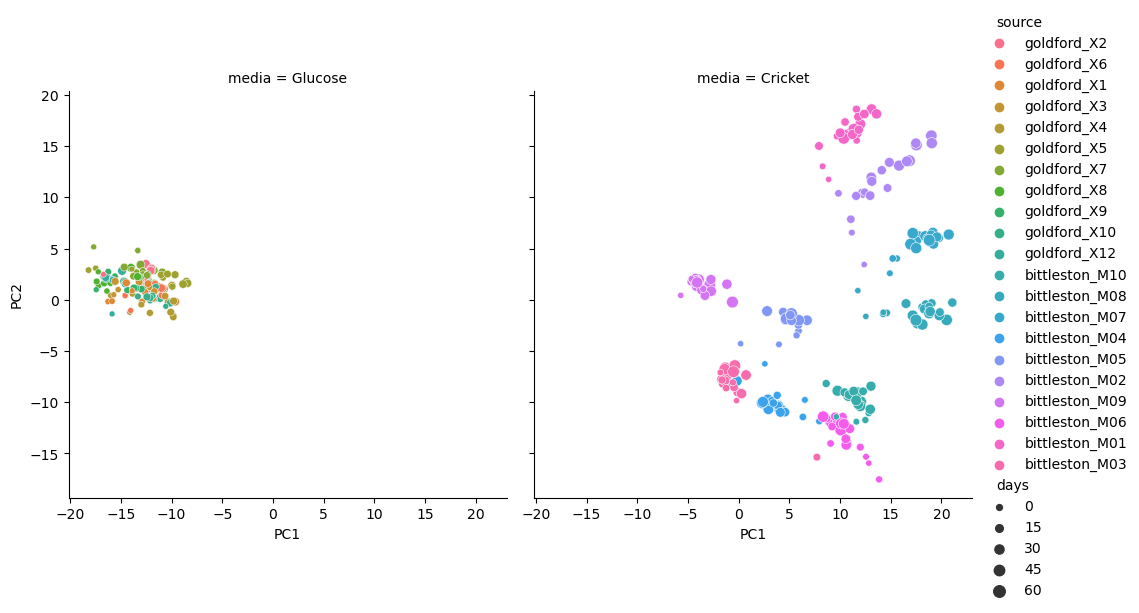

In [58]:
"Visualize PCA"
sns.relplot(x="PC1",y="PC2",hue="source",size="days",col="media",data=pca_df)
plt.show()

# Problem 4: Quantifying the qualitative
What differences do you see between the dynamics of the communities grown in glucose vs. cricket media?

It appears that microbiomes in gluocse "converge" more strongly to the same community composition than those grown in the cricket media.

Let's try to quantify this difference by quantifying the distribution of pairwise distances between all samples at day 24 for the two media.

In a for loop for each media:
1. Get a list of day 24 samples for the given media
2. Subset the transposed ASV table to those samples
3. Compute the pairwise distance between all of the samples with [pdist()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html). *(Note that by default, `pdist` computes the Euclidean distance between all pairs of samples). Also notice that `pdist` returns a single pairwise distance for each pair of provided samples.*
4. Place those pairwise distances into a DataFrame and label the column `dist`.
5. Make a new column in that DataFrame that indicates the media.
6. Append that DataFrame to a list called `dist_data`, which is initialized before the loop.

Once all pairwise distances have been calculated for communities grown in glucose and cricket media:
1. Concatenate the pairwise distances from day 24 for both studies into one dataframe.
1. Make a boxplot of these pairwise distances for each condition.
2. Perform a two-sided Mann-Whitney test on these two distributions.

In [ ]:
"Compute pairwise distances for each media at day 24"
dist_data = []
for media in md.media.unique():
    # Get samples for this media at day 24
    samples_24 = None
    # Subset the ASV table to these samples
    asv_24 = asv_T.loc[samples_24]
    # Compute the pairwise distances of these samples
    dist_24 = None
    # Place these distances into a DataFrame, name the column `dist`, and then add a new column 
    dist_media_df = None
    dist_data.append(dist_media_df)
    
# Concetane into one dataframe
dist_24_df = pd.concat(dist_data)
dist_24_df.head()

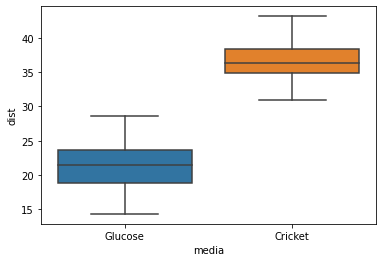

In [ ]:
"Visaulize"

plt.show()

In [ ]:
"Statistic"
sps.mannwhitneyu()

MannwhitneyuResult(statistic=0.0, pvalue=5.1466498438574325e-18)